<a href="https://colab.research.google.com/github/hibatullah24/Code-Acadme/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [35]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


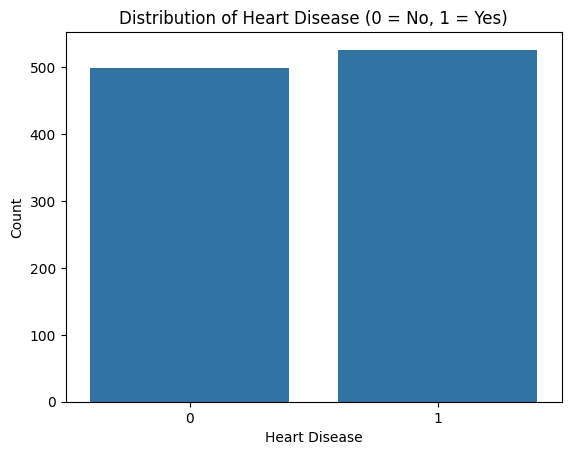

In [36]:
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


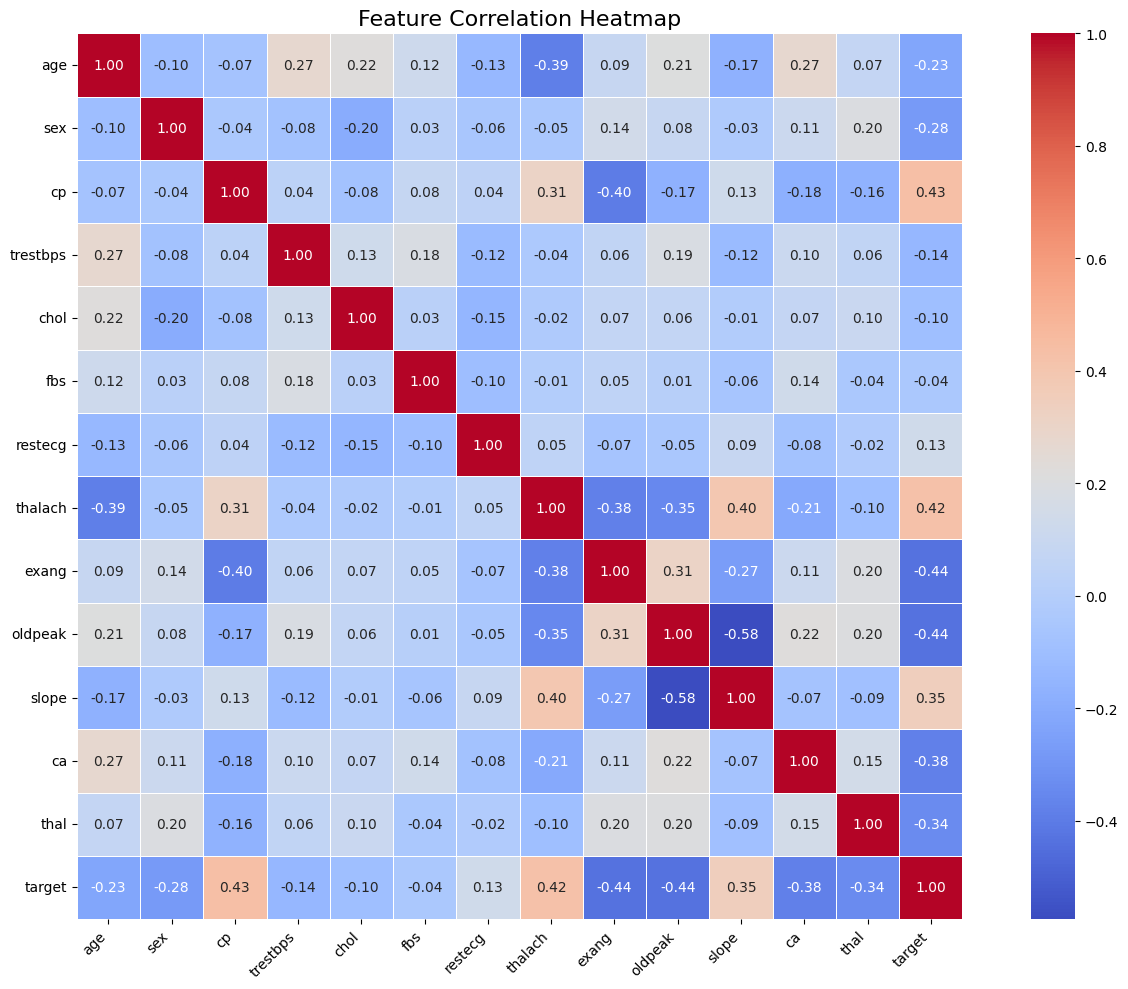

In [37]:
plt.figure(figsize=(14, 10))  # Width x Height in inches
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
df = df.replace('?', np.nan)
df = df.dropna()

In [39]:
X = df.drop('target', axis=1)
y = df['target'].astype(int)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Log-Odds": model.coef_[0],
    "Odds Ratio": np.exp(model.coef_[0])
})

print(coefficients)

     Feature  Log-Odds  Odds Ratio
0        age  0.000642    1.000642
1        sex -1.714708    0.180016
2         cp  0.847057    2.332771
3   trestbps -0.018159    0.982005
4       chol -0.008867    0.991172
5        fbs -0.164529    0.848293
6    restecg  0.262391    1.300035
7    thalach  0.028880    1.029301
8      exang -0.835868    0.433498
9    oldpeak -0.679894    0.506671
10     slope  0.535876    1.708945
11        ca -0.814054    0.443058
12      thal -1.072174    0.342264


Key Features to Interpret:

Age: Log-odds is positive (0.000642), and the odds ratio is 1.000642, indicating a very small increase in the likelihood of heart disease with age.

Sex: Log-odds is negative (-1.714708), and the odds ratio is 0.18, suggesting that being female (sex = 0) decreases the odds of heart disease significantly.

Chest Pain Type (cp): Log-odds is positive (0.847057), and the odds ratio is 2.33, meaning chest pain type increases the likelihood of heart disease.

Resting Blood Pressure (trestbps): The odds ratio is 0.98, meaning that higher blood pressure slightly decreases the likelihood of heart disease.

> Add blockquote



[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

ROC AUC Score: 0.8770226537216829


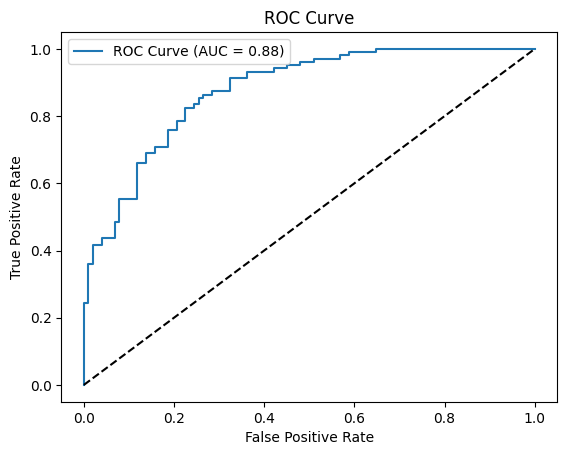

In [43]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Summary:
The model achieves 80% accuracy, meaning it is correct most of the time.

For class 0 (no disease):

The model is good at identifying cases where there is no disease (precision = 85%), but it misses some cases (recall = 72%).

For class 1 (disease):

The model performs better with a higher recall (87%) and a good precision (76%), meaning it detects disease cases well.

The F1-scores show a decent balance of precision and recall for both classes.

The ROC AUC score of 0.88 suggests the model has excellent discriminatory ability between the two classes.

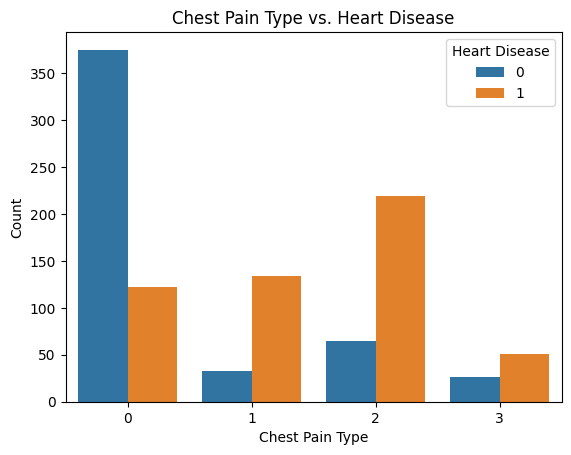

In [44]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

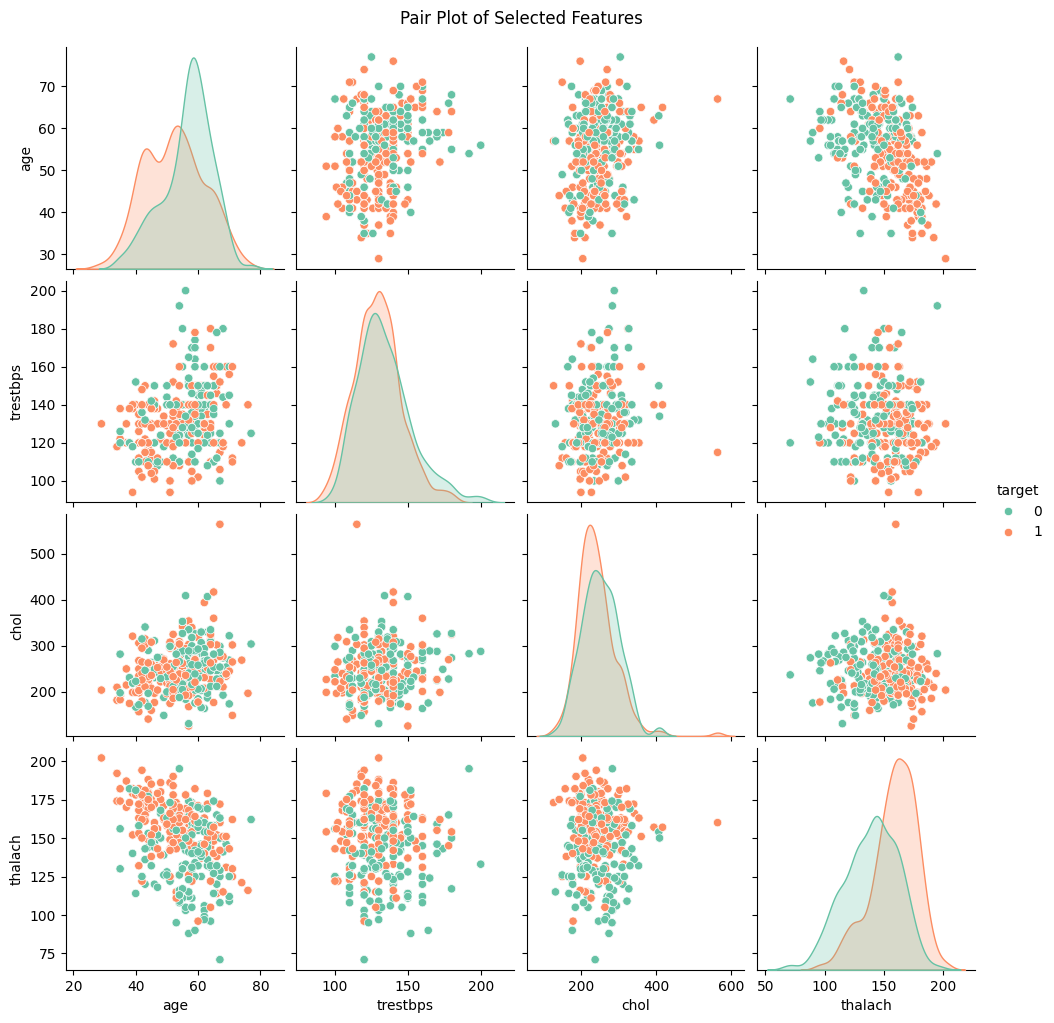

In [45]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target', palette='Set2')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [46]:
#Pseudo R-squared
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm

logit_model = Logit(y, sm.add_constant(X)).fit()
print(logit_model.prsquared)  # McFadden's R²


Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
0.49382088000796986


In [47]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

# Add a constant (intercept) to the feature matrix
X_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = Logit(y, X_const).fit()

# Display model summary
print("\n--- Logistic Regression Model Summary ---")
print(logit_model.summary())

# Extract and print McFadden's R-squared
print("\nMcFadden's R² (Pseudo R-squared):", logit_model.prsquared)

# Extract and print AIC (model fit metric, lower is better)
print("AIC (Akaike Information Criterion):", logit_model.aic)

# Final note: this model is selected as the best for interpretation and evaluation
print("\n✅ This logistic regression model is selected for further analysis based on model fit and convergence.")


Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7

--- Logistic Regression Model Summary ---
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Tue, 13 May 2025   Pseudo R-squ.:                  0.4938
Time:                        08:08:27   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.94

**Without Spliting the Dataset fit all Model with Random Forest**


--- Confusion Matrix ---
[[499   0]
 [  0 526]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025


--- ROC AUC Score ---
ROC AUC: 1.0


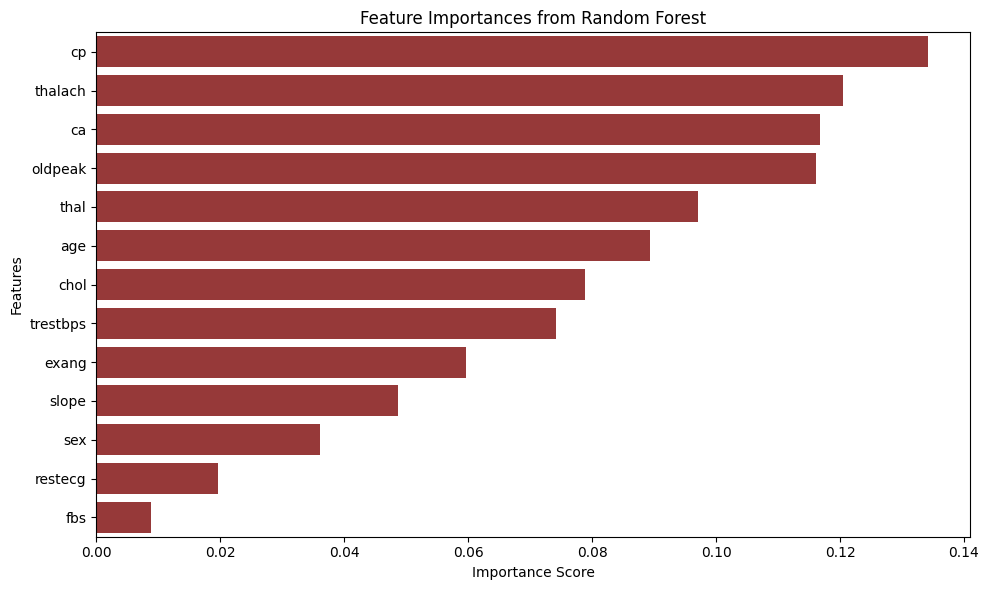

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Fit Random Forest using all data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Step 2: Predict on the same data (since no split)
y_pred = rf_model.predict(X)
y_proba = rf_model.predict_proba(X)[:, 1]

# Step 3: Evaluate the model
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y, y_pred))

print("\n--- ROC AUC Score ---")
print("ROC AUC:", roc_auc_score(y, y_proba))

# Step 4: Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature Importance Plot with Pink Color
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, color='brown')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

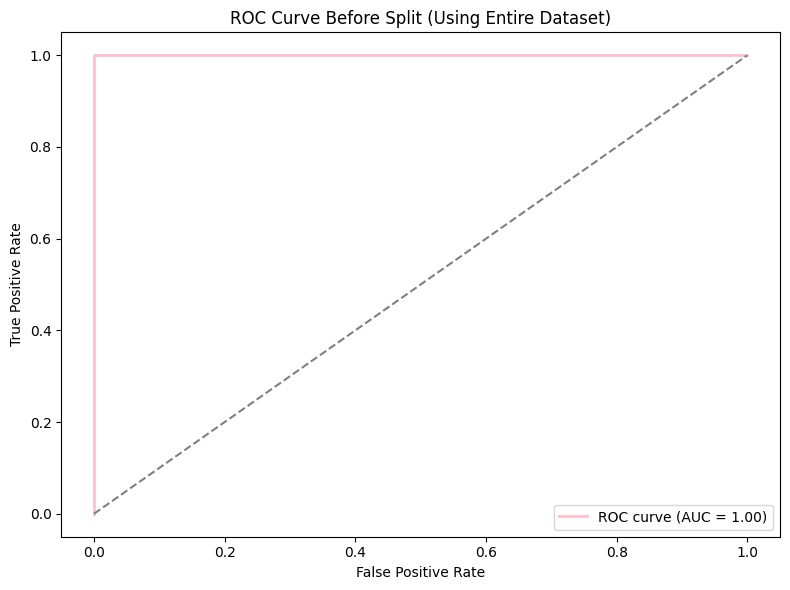

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest on the entire dataset before the split
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X, y)

# Predict probabilities for the entire dataset
y_proba_full = rf_full.predict_proba(X)[:, 1]

# Compute ROC curve
fpr_full, tpr_full, _ = roc_curve(y, y_proba_full)

# Calculate AUC score for the full dataset
roc_auc_full = roc_auc_score(y, y_proba_full)

# Plot the ROC curve for the full dataset
plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc_full:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.title('ROC Curve Before Split (Using Entire Dataset)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)
print(sorted_importances)

top_features = sorted_importances.head(8).index
X_selected = X[top_features]

cp          0.134201
thalach     0.120473
ca          0.116755
oldpeak     0.116151
thal        0.097043
age         0.089313
chol        0.078930
trestbps    0.074253
exang       0.059592
slope       0.048738
sex         0.036057
restecg     0.019619
fbs         0.008874
dtype: float64


In [51]:
# Fitting the modual with top 8 selected features:

top_features = sorted_importances.head(8).index
# Select only the important features
X_selected = X[top_features]


In [52]:
# Fit the Random Forest model with the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_selected, y)

# Predict with the selected features
y_pred = rf_selected.predict(X_selected)
y_proba = rf_selected.predict_proba(X_selected)[:, 1]

# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y, y_pred))

print("\n--- ROC AUC Score ---")
print("ROC AUC:", roc_auc_score(y, y_proba))



--- Confusion Matrix ---
[[499   0]
 [  0 526]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025


--- ROC AUC Score ---
ROC AUC: 1.0


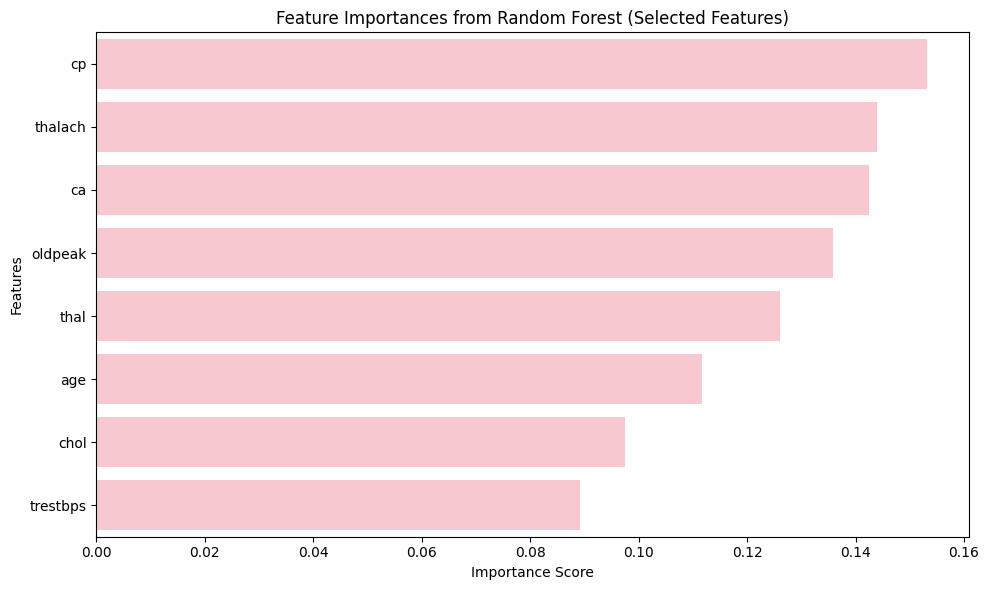

In [53]:
# Get feature importance for the selected features
importances_selected = pd.Series(rf_selected.feature_importances_, index=X_selected.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_selected, y=importances_selected.index, color='pink')
plt.title("Feature Importances from Random Forest (Selected Features)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


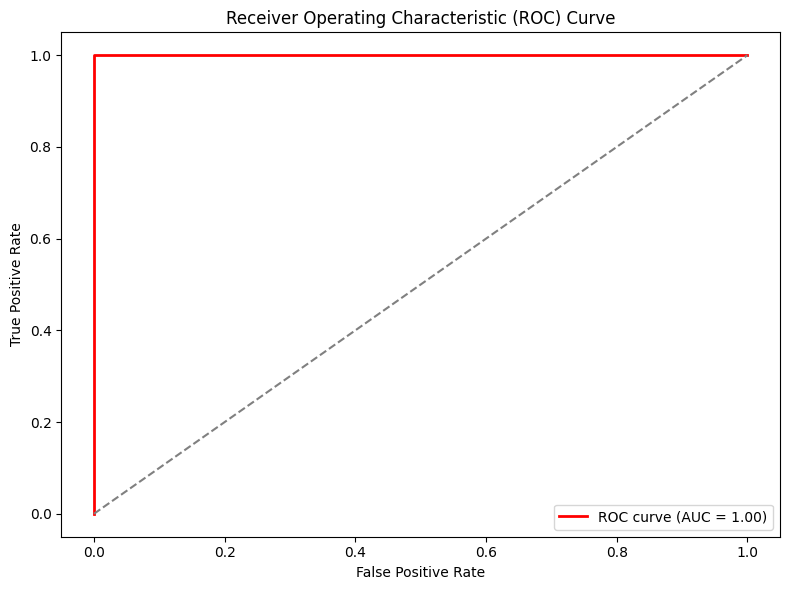

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_proba = rf_selected.predict_proba(X_selected)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
